<a href="https://colab.research.google.com/github/Ljmarcer/Tensorflow_Hand-drawn_Numbers/blob/main/Number_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Number Clasifier
> This was one of my first projects in deep learning with tensorflow, I recently added my hand-drawn just to check how bad I draw. 

## Dataset preparation

In [ ]:
import numpy as np 
import tensorflow as tf
import tensorflow_datasets as tfds
import math
import matplotlib.pyplot as plt
import logging

In [ ]:
dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True) #Obtenemos el dataset de tf

In [ ]:
train_data, test_data = dataset['train'] , dataset['test'] 
classes = [
    'Zero', 'One', 'Two', 'three', 'Four', 'Five', 'Six',
    'Seven', 'Eight', 'Nine'
] 

In [ ]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

In [ ]:
dataset['train']

<PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
image = image.imread('Numbers/Eight.png')
# summarize shape of the pixel array
print(image.dtype)
print(image.shape)

float32
(28, 28, 4)


In [ ]:
def norm (images, labels):
  images = tf.cast(images,tf.float32) # 
  images /= 255  #
  return images, labels



In [ ]:
train_data = train_data.map(norm)
test_data = test_data.map(norm)


## Build Model

In [ ]:

model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28,28,1)),
tf.keras.layers.Dense(64, activation= tf.nn.relu),
tf.keras.layers.Dense(64, activation= tf.nn.relu),
tf.keras.layers.Dense(10, activation=tf.nn.softmax) 
])

## Compile and Train Model

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
BATCHSIZE = 32
train_data = train_data.repeat().shuffle(num_train_examples).batch(BATCHSIZE) 
test_data = test_data.repeat().shuffle(num_test_examples).batch(BATCHSIZE)

model.fit(
	train_data, epochs=15,
	steps_per_epoch=math.ceil(num_train_examples/BATCHSIZE)
)


Epoch 1/15
1875/1875 [==============================] - 23s 7ms/step - loss: 0.2654 - accuracy: 0.9231
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1202 - accuracy: 0.9639
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0899 - accuracy: 0.9725
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0708 - accuracy: 0.9782
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0578 - accuracy: 0.9814
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0480 - accuracy: 0.9841
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0406 - accuracy: 0.9869
Epoch 8/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0357 - accuracy: 0.9887
Epoch 9/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0306 - accuracy: 0.9894
Epoch 10/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0

In [ ]:
test_loss , test_accuracy = model.evaluate(test_data, steps= math.ceil(num_test_examples/32) )
print("test data accuracy: \n ", test_accuracy)

313/313 [==============================] - 2s 3ms/step - loss: 0.1163 - accuracy: 0.9738
test data accuracy: 
  0.9738418459892273


## Prediction & Visualization 

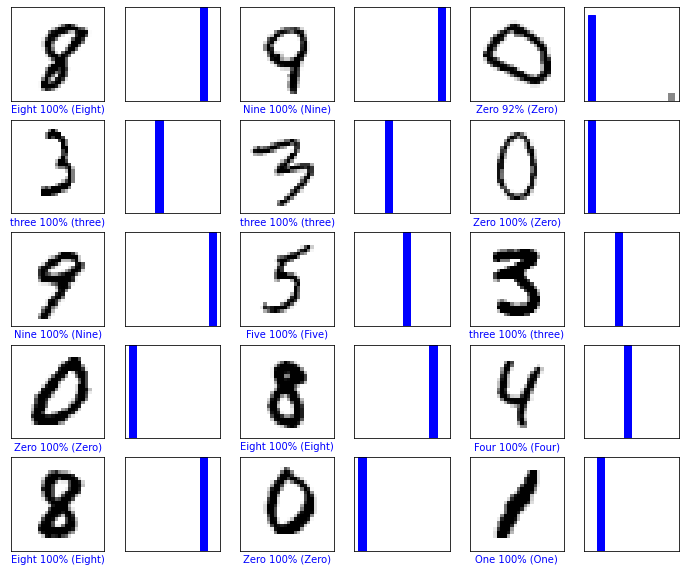

In [ ]:
for test_images, test_labels in test_data.take(1):
	test_images = test_images.numpy()
	test_labels = test_labels.numpy()
	predictions = model.predict(test_images)
def image_fig(i, predictions_array, true_labels, images, internal):
	predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
	plt.grid(False)
	plt.xticks([])
	plt.yticks([])
	if internal:
		plt.imshow(img[...,0], cmap=plt.cm.binary)
	else:
		plt.imshow(img, cmap=plt.cm.binary)
	predicted_label = np.argmax(predictions_array)
	if predicted_label == true_label:
		color = 'blue'
	else:
		color = 'red'
	plt.xlabel("{} {:2.0f}% ({})".format(classes[predicted_label],
                                100*np.max(predictions_array),
                                classes[true_label]),
                                color=color)

	#plt.xlabel(class_names[predicted_label], color=color)

def percentages_fig(i, predictions_array, true_label):
	predictions_array, true_label = predictions_array[i], true_label[i]
	plt.grid(False)
	plt.xticks([])
	plt.yticks([])
	thisplot = plt.bar(range(10), predictions_array, color="#888888")
	plt.ylim([0,1])
	predicted_label = np.argmax(predictions_array)

	thisplot[predicted_label].set_color('red')
	thisplot[true_label].set_color('blue')

numrows=5
numcols=3
numimages = numrows*numcols

plt.figure(figsize=(2*2*numcols, 2*numrows))
for i in range(numimages):
	plt.subplot(numrows, 2*numcols, 2*i+1)
	image_fig(i, predictions, test_labels, test_images, True)
	plt.subplot(numrows, 2*numcols, 2*i+2)
	percentages_fig(i, predictions, test_labels)

plt.show()

## My Handdrawing Test
> Let's try the model on  my hand-drawn numbers, I created the iamges with sketchpad.

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Numbers.zip to Numbers.zip


In [ ]:
!unzip Numbers.zip

Archive:  Numbers.zip
replace Numbers/Eight.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: Numbers/Eight.png       
 extracting: Numbers/Five.png        
 extracting: Numbers/Four.png        
 extracting: Numbers/Nine.png        
 extracting: Numbers/One.png         
 extracting: Numbers/Seven.png       
 extracting: Numbers/Six.png         
 extracting: Numbers/Three.png       
 extracting: Numbers/Two.png         
 extracting: Numbers/Zero.png        


Create text labels and image arrays

In [ ]:
path = 'Numbers/'
import glob
import os 
from matplotlib import image
from PIL import Image
labels = []
images = []
labels = [i.split('.', 1)[0] for i in os.listdir(path)]
for filepath in os.listdir(path):
    from PIL import Image
    img = np.array(Image.open(path + filepath).convert('L'))
    images.append(img)



In [ ]:
for i in range(len(images)):
  images[i] = np.invert(images[i])
  images[i], labels[i] = norm(images[i], labels[i])

In [ ]:
 predictions = model.predict(tf.convert_to_tensor(images))

In [ ]:
dict_names = {'Zero': 0,'One':1, 'Two':2, 'Three':3, 'Four':4, 'Five':5, 'Six':6, 'Seven':7 , 'Eight':8, 'Nine':9}

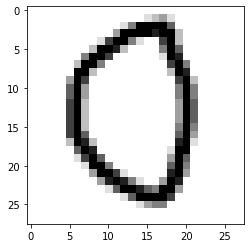

In [ ]:
plt.imshow(images[0], cmap=plt.cm.binary)

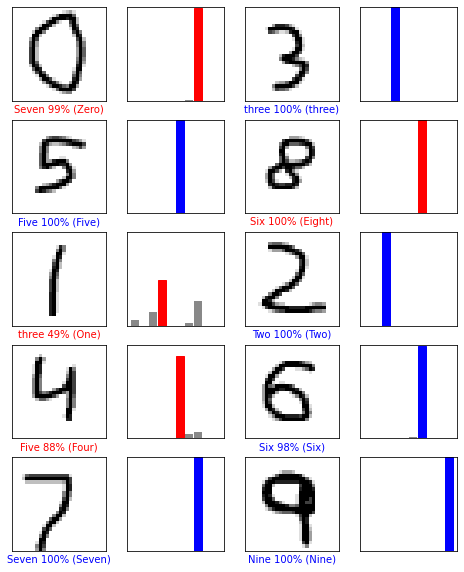

In [ ]:
numrows=5
numcols=2
numimages = numrows*numcols

plt.figure(figsize=(2*2*numcols, 2*numrows))
for i in range(numimages):
	plt.subplot(numrows, 2*numcols, 2*i+1)
	image_fig(i, predictions,  list(map(lambda x: dict_names[x] ,labels)), images, False)
	plt.subplot(numrows, 2*numcols, 2*i+2)
	percentages_fig(i, predictions,  list(map(lambda x: dict_names[x] ,labels)))

plt.show()

I wanted to try a few things here, for example 
- the number seven is not ecognized with a middle cross,
- if eight has a smal deviation it could be interpreted as a six or two becasue those numbers contains a twist.
Zeros that dont sustantially occupy the total portion of the frame are likely to classify as an 8 , mistaking it with its upper circle.

Why 0,1 and 4 were not correctly predicted I do not understand.

My handrawing is awful aswell, that probably matters 🤧🤧🤧
